In [1]:
from os import path
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageEnhance
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import re
import numpy as np
from io import BytesIO
import datetime
import random

In [41]:
def green_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(87, 154), random.randint(0, 100) ,random.randint(0, 100))


def random_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(0, 357), random.randint(0, 100) ,random.randint(0, 100))


def red_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(0, 6), random.randint(0, 100) ,random.randint(0, 100))




def orange_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(14, 38), random.randint(0, 100) ,random.randint(0, 100))




def yellow_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(39, 69), random.randint(0, 100) ,random.randint(0, 100))


def teal_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(147, 180), random.randint(0, 100) ,random.randint(0, 100))


def lightblue_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(180, 200), random.randint(0, 100) ,random.randint(0, 100))


def darkblue_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(208, 250), random.randint(0, 100) ,random.randint(0, 100))




def purple_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(256, 283), random.randint(0, 100) ,random.randint(0, 100))


def pink_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(293, 341), random.randint(0, 100) ,random.randint(0, 100))



In [56]:
def getcorpus(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    words = soup.get_text()
    words= re.sub("[^a-zA-Z' ]+", " ", words)
    return words


#basic cloud
def cloud(text,imgurl,save, color):
    response1 = requests.get(imgurl)
    img = Image.open(BytesIO(response1.content))
    mask = np.array(img)
    wordcloud = WordCloud(stopwords = stopwords, background_color="white", max_words=7000, mask=mask).generate(text)
    image_colors = ImageColorGenerator(mask)
    plt.figure(figsize=[8,8])
    if color =="random":
        plt.imshow(wordcloud.recolor(color_func=random_color_func), interpolation="bilinear")
    elif color =="green":
        plt.imshow(wordcloud.recolor(color_func=green_func), interpolation="bilinear")
    elif color =="red":
        plt.imshow(wordcloud.recolor(color_func=red_func), interpolation="bilinear")
    elif color =="orange":
        plt.imshow(wordcloud.recolor(color_func=orange_func), interpolation="bilinear")
    elif color =="yellow":
        plt.imshow(wordcloud.recolor(color_func=yellow_func), interpolation="bilinear")
    elif color == "teal":
        plt.imshow(wordcloud.recolor(color_func=teal_func), interpolation="bilinear")
    elif color == "lightblue":
        plt.imshow(wordcloud.recolor(color_func=lightblue_func), interpolation="bilinear")
    elif color =='darkblue':
        plt.imshow(wordcloud.recolor(color_func=darkblue_func), interpolation="bilinear")
    elif color == "purple":
        plt.imshow(wordcloud.recolor(color_func=purple_func), interpolation="bilinear")
    elif color =="pink":
        plt.imshow(wordcloud.recolor(color_func=pink_func), interpolation="bilinear")
    else:
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis("off")
    if save == "yes":
        plt.savefig("viz"+str(datetime.datetime.now().second)+str(datetime.datetime.now().minute)+".png", format="png")
    plt.show()
    plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
#advanced cloud either local or url image
def cloudtweek(text, imgloc, imgurl,maxsize , maxwords, save, title, color):
    if imgloc == "local":
        mask = np.array(Image.open(imgurl))
    else:
        response1 = requests.get(imgurl)
        img = Image.open(BytesIO(response1.content))
        mask = np.array(img)
    wordcloud = WordCloud(stopwords = stopwords, background_color="white", max_words=maxwords,max_font_size=maxsize,  mask=mask).generate(text)
    image_colors = ImageColorGenerator(mask)
    plt.figure(figsize=[8,8])
    plt.title(title)
    if color =="random":
        plt.imshow(wordcloud.recolor(color_func=random_color_func), interpolation="bilinear")
    elif color =="green":
        plt.imshow(wordcloud.recolor(color_func=green_func), interpolation="bilinear")
    elif color =="red":
        plt.imshow(wordcloud.recolor(color_func=red_func), interpolation="bilinear")
    elif color =="orange":
        plt.imshow(wordcloud.recolor(color_func=orange_func), interpolation="bilinear")
    elif color =="yellow":
        plt.imshow(wordcloud.recolor(color_func=yellow_func), interpolation="bilinear")
    elif color == "teal":
        plt.imshow(wordcloud.recolor(color_func=teal_func), interpolation="bilinear")
    elif color == "lightblue":
        plt.imshow(wordcloud.recolor(color_func=lightblue_func), interpolation="bilinear")
    elif color =='darkblue':
        plt.imshow(wordcloud.recolor(color_func=darkblue_func), interpolation="bilinear")
    elif color == "purple":
        plt.imshow(wordcloud.recolor(color_func=purple_func), interpolation="bilinear")
    elif color =="pink":
        plt.imshow(wordcloud.recolor(color_func=pink_func), interpolation="bilinear")
    else:
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis("off")
    if save == "yes":
        plt.savefig("viz"+str(datetime.datetime.now().second)+str(datetime.datetime.now().minute)+".png", format="png")
    plt.show()
    plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
    plt.axis("off")
    
    plt.show()
    
#basic cloud local image     
def cloud_local(text,img,save, color):
    mask = np.array(Image.open(img))
    wordcloud = WordCloud(stopwords = stopwords, background_color="white", max_words=7000, mask=mask).generate(text)
    image_colors = ImageColorGenerator(mask)
    plt.figure(figsize=[8,8])
    if color =="random":
        plt.imshow(wordcloud.recolor(color_func=random_color_func), interpolation="bilinear")
    elif color =="green":
        plt.imshow(wordcloud.recolor(color_func=green_func), interpolation="bilinear")
    elif color =="red":
        plt.imshow(wordcloud.recolor(color_func=red_func), interpolation="bilinear")
    elif color =="orange":
        plt.imshow(wordcloud.recolor(color_func=orange_func), interpolation="bilinear")
    elif color =="yellow":
        plt.imshow(wordcloud.recolor(color_func=yellow_func), interpolation="bilinear")
    elif color == "teal":
        plt.imshow(wordcloud.recolor(color_func=teal_func), interpolation="bilinear")
    elif color == "lightblue":
        plt.imshow(wordcloud.recolor(color_func=lightblue_func), interpolation="bilinear")
    elif color =='darkblue':
        plt.imshow(wordcloud.recolor(color_func=darkblue_func), interpolation="bilinear")
    elif color == "purple":
        plt.imshow(wordcloud.recolor(color_func=purple_func), interpolation="bilinear")
    elif color =="pink":
        plt.imshow(wordcloud.recolor(color_func=pink_func), interpolation="bilinear")
    else:
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
   
    plt.axis("off")
    if save == "yes":
        plt.savefig("viz"+str(datetime.datetime.now().second)+str(datetime.datetime.now().minute)+".png", format="png")
    plt.show()
    plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    


In [3]:
HP1 = getcorpus("https://github.com/formcept/whiteboard/blob/master/nbviewer/notebooks/data/harrypotter/Book%201%20-%20The%20Philosopher's%20Stone.txt")
HP1 =HP1.replace('Page     Harry Potter and the Philosophers Stone   J K  Rowling', '') 


stopwords = set(STOPWORDS)

In [4]:
HP2 = getcorpus("http://www.pauladaunt.com/books/Children's/Harry_Potter1-4-1/J.%20K.%20Rowling%20-%20Harry%20Potter%202%20-%20The%20Chamber%20Of%20Secrets.txt")


In [7]:
HP3 = getcorpus("http://www.pauladaunt.com/books/Children's/Harry_Potter1-4/J.%20K.%20Rowling%20-%20Harry%20Potter%203%20-%20Prisoner%20of%20Azkaban.txt")

In [8]:
HP4 = getcorpus("https://cdn.preterhuman.net/texts/literature/books_by_title/N%20-%20S/Rowlings%20Goblet%20of%20Fire.txt")

In [9]:
HP5 = getcorpus("https://raw.githubusercontent.com/bobdeng/owlreader/master/ERead/assets/books/Harry%20Potter%20and%20the%20Order%20of%20the%20Phoenix.txt")

In [10]:
HP6 = getcorpus("https://github.com/bobdeng/owlreader/blob/master/ERead/assets/books/Harry%20Potter%20and%20The%20Half-Blood%20Prince.txt")

In [12]:
HP7 = getcorpus("https://raw.githubusercontent.com/bobdeng/owlreader/master/ERead/assets/books/Harry%20Potter%20and%20the%20Deathly%20Hallows%20.txt")

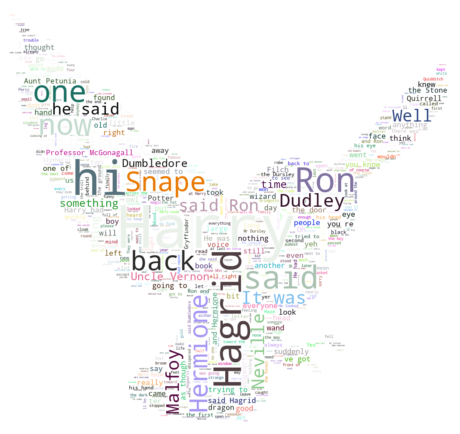

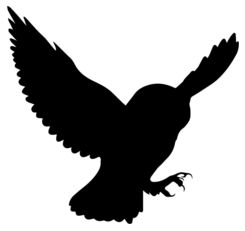

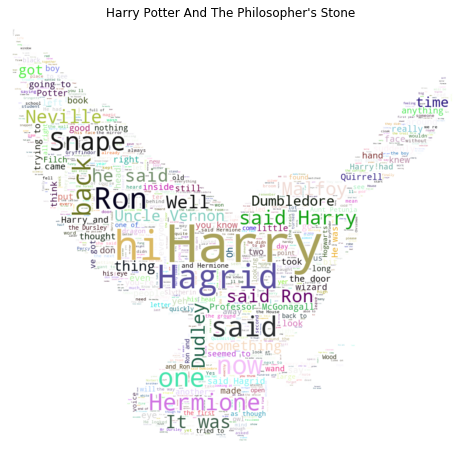

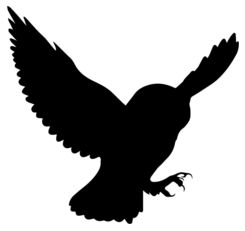

In [18]:
cloudtweek(HP1, "local", "slack-imgs edit.jpg",120, 70000, "yes", "Harry Potter And The Philosopher's Stone", "random" )




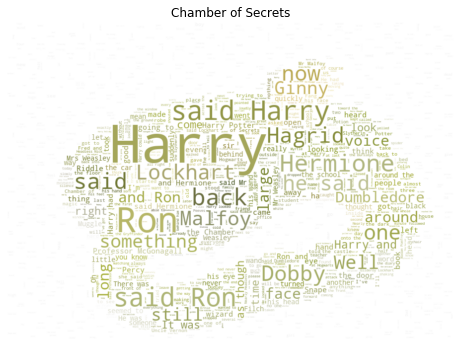

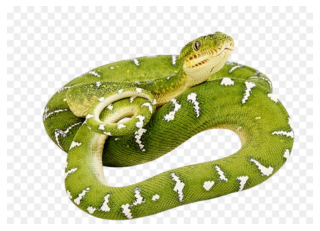

In [26]:
cloudtweek(HP2, "url", "https://library.kissclipart.com/20180904/sge/kissclipart-green-snake-png-clipart-snakes-reptile-smooth-gree-83b391040719c542.jpg", 120, 70000, "yes", "Chamber of Secrets", "image")

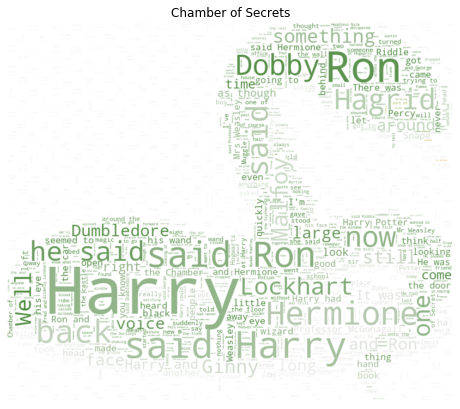

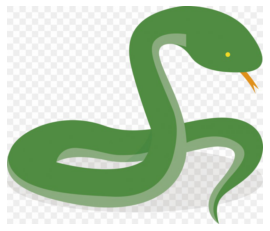

In [29]:
cloudtweek(HP2, "url",
          "https://img.favpng.com/7/19/0/snake-euclidean-vector-animal-png-favpng-5Hid3R3UDwrGQXMGEpASUTp6t.jpg",
          120, 70000, "yes", "Chamber of Secrets", "image")

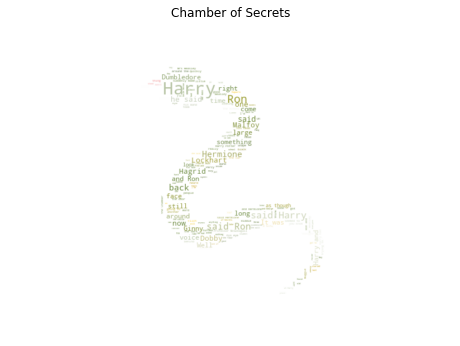

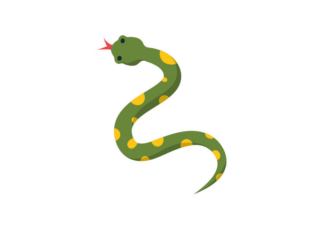

In [28]:
cloudtweek(HP2, "url", "https://superawesomevectors.com/wp-content/uploads/2017/07/snake-flat-vector-800x566.jpg",
          120, 7000, "yes", "Chamber of Secrets", "image")

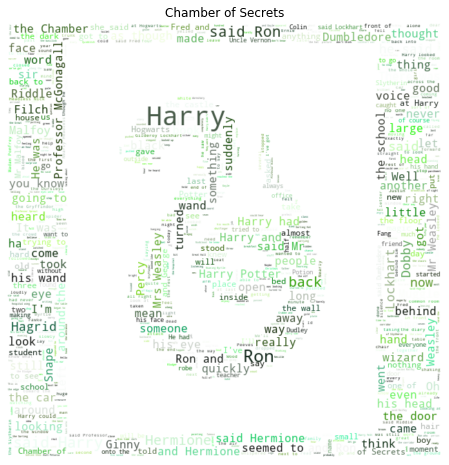

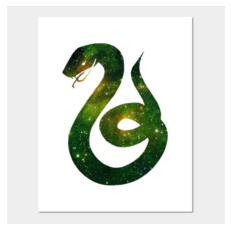

In [33]:
cloudtweek(HP2, "local",
           "snake2.jpg",
          120, 70000, "yes", "Chamber of Secrets", "green")

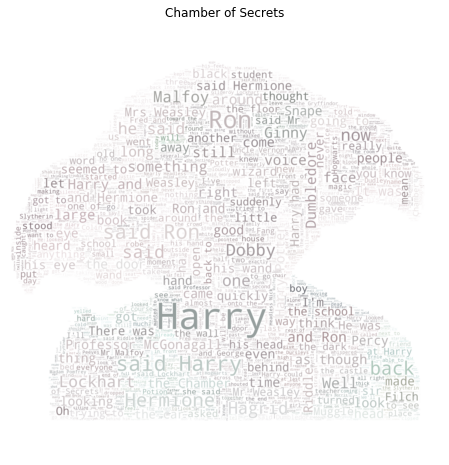

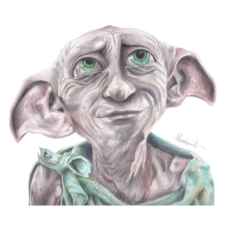

In [38]:
cloudtweek(HP2, "url", "https://i.dlpng.com/static/png/6760651_preview.png",
          170, 7000, "yes", "Chamber of Secrets", "image")

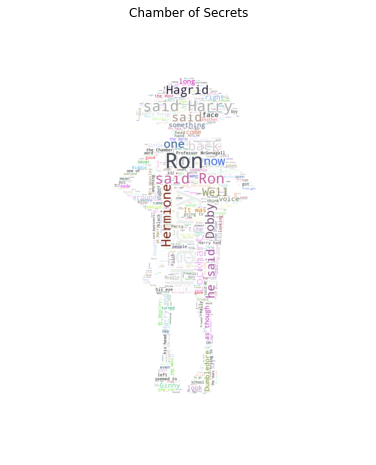

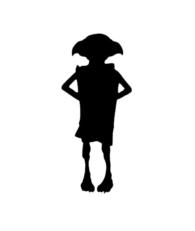

In [37]:
cloudtweek(HP2, "url", "https://3.bp.blogspot.com/-j0V88wJQvbQ/WHcUL2VoUKI/AAAAAAAB3pw/V_Z-k42GU4MYfdUizZU9joUcHFWfeQMPQCLcB/s1600/DobbyOutlineFinal.jpg",
          120, 70000, "yes", "Chamber of Secrets", "random")

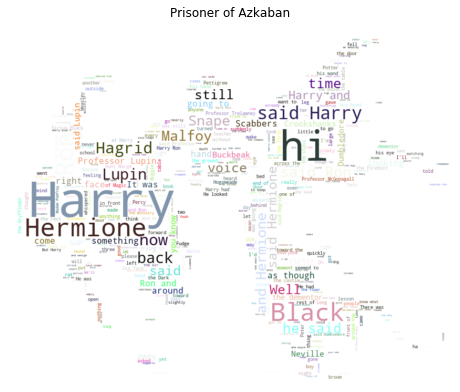

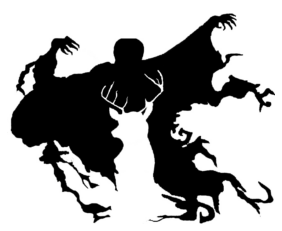

In [39]:
cloudtweek(HP3, "local", "dementor.jpg",
          170, 7000, "yes", "Prisoner of Azkaban", "random")

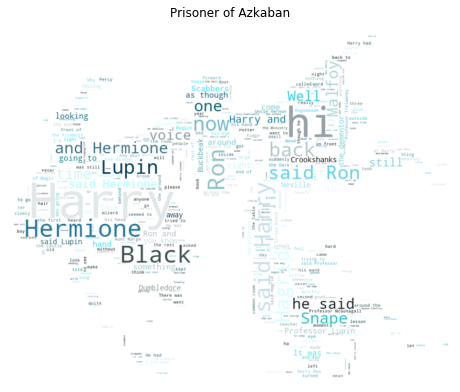

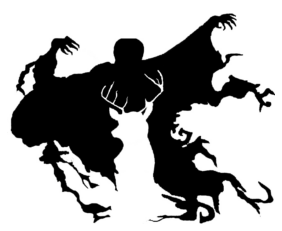

In [58]:
cloudtweek(HP3, "local", "dementor.jpg",
          120, 7000, "yes", "Prisoner of Azkaban", "lightblue")